<a href="https://colab.research.google.com/github/dilipiitdhn/Capstone-Project-on-Exploratory-Data-Analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## Loading the data

In [ ]:
# import necessary libraries for processing the data
import pandas as pd
import numpy as np


In [ ]:
# read the data stored in csv format and convert it in Pandas Dataframe format
url = 'https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
airbnb_df = pd.read_csv(url)


In [ ]:
# general inspection of data
airbnb_df.loc[:25, ['availability_365']].sort_values('availability_365')
airbnb_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
# checking shape and size of the data
airbnb_df.shape

# The data have 48895 row and 16 column

(48895, 16)

In [ ]:
# checking all the colums and their data type
airbnb_df.info() 

So we have 16 column which has numerical or categorical values. Only *last_review* and *reviews_per_month* columns seems to have alot of null values. But we will see null values thoroughly.

# **Data Cleaning**

In [ ]:
airbnb_df.isnull().sum()

Here, we see all the null values. By looking at nature of our analysis and dataset we can say **name** and **host_name** are insignificant and irrelevent for our data analysis. **last_review** is nothing but the date on which the particular property recieved its last review and we have nothing to do with that. So we can simply drop these three column. **reviews_per_month** has the number of reviews a propety recieves in a month. For **reviews_per_month** we can simply replace null values with 0. That means we are considering that the property does not receive any review in a month.

In [ ]:
# Lets drop undesired columns and treat missing/null values

airbnb_df.drop(columns =['name','host_name','last_review'], inplace = True)
airbnb_df.replace(np.NaN, 0, inplace =True)
airbnb_df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Here, we see no null values. By now we are done with handling the missng values. However, there are columns having numerical value *price*, *availability_365* and *minimum_nights* which can be crucial for our analysis. So, we need to clean these columns from outliers and some unrealistical values if any present.

In [ ]:
# First examine price column
price = pd.DataFrame(airbnb_df['price'].describe()).transpose()
price

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0


See, we have price as low as as 0 dollors that does not make sense. Max price go upto 10000 dollors whereas the prices upto 75 percentile are only around 175 dollors. To remove these outliers in price values we will exclude the prices 3 times more than that of average price of 75 percentile.

In [ ]:
# excluding outliers and unrealisitic price values from dataset
airbnb_df = airbnb_df[(airbnb_df['price']>0) & (airbnb_df['price']<525)]    # 175*3 = 525

In [ ]:
# now examine availability_365
availability_365 = pd.DataFrame(airbnb_df['availability_365'].describe()).T
availability_365

,count,mean,std,min,25%,50%,75%,max
availability_365,47859.0,111.231952,130.982257,0.0,0.0,43.0,221.0,365.0


Here, maximum availability is 365 days which is absolutely fine. And minimum value is 0 which is also fine as there may be properties which are not in not functioning condtion currently.
We are good to go with availability_365 data without any cleaning.

In [ ]:
# now examine minimum_nights
minimum_nights = pd.DataFrame(airbnb_df['minimum_nights'].describe()).T
minimum_nights

,count,mean,std,min,25%,50%,75%,max
minimum_nights,47859.0,6.980693,20.384544,1.0,1.0,2.0,5.0,1250.0


Minimum number of nights for making a booking is 1 which is fine. But the maximum is 1250 whereas average of 75 percentile is 5. And minimum number of nights for making a booking being 1250, is practically impossible. Since nobody make booking for years. This maximum value of minimum number of nights for making a booking is an outlier. We will set it equal to 3 times that of the average for 75 percentile. 

In [ ]:
# excluding outliers and unrealisitic minimum_nights values from dataset
airbnb_df = airbnb_df[(airbnb_df['minimum_nights']>0) & (airbnb_df['minimum_nights']<15)]    # 5*3 = 15

In [ ]:
# before procedding to dataset Exploration & Visualisation check the cuurent size of data
airbnb_df.shape

(42124, 13)

Great, Now we are left with only 42124 entries to deal with.

In [ ]:
airbnb_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Exploring & Visualising the data :
Now have a look at some categorial values which can be very crusial for our analysis. Like, room type, price and location. As these aspects can potentially change customer's booking preference. 
And these details are stored in *room_type*, *neighbourhood*,
*neighbourhood_group* and *price* columns. So let's explore these columns. 

In [ ]:
# Import some libraries for visualising the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [ ]:
# start from the neighbourhoods
# check number of  neighbourhoods
airbnb_df.neighbourhood.unique()  # too many cities

# number of unique cities
len(airbnb_df.neighbourhood.unique()) 

221

In [ ]:
# check the different neighbourhood_group/boroughs in which properties are registered
airbnb_df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

By doing a preliminary examination of dataset we figured out that the dataset contain records of 48895 properties registered on Airbnb plateform in 221 different neighbourhood across five neighbourhood group or boroughs i.e. Brooklyn, Manhattan, Queens, Staten Island and Bronx of New York city, USA. So in USA, A neighbourhood is a geographically localised community within a larger city, town, suburb or rural area, sometimes consisting of a single street and the buildings lining it. And boroughs are a unit of local government or other administrative division below the level of the state. Brorough in USA are somewhat similiar with districts in India.

Disclaimer: From now on I will be using the name borough instead of *neighbourhood group* for the sack of reducing my typing effort, Thanks.

Text(0, 0.5, 'Number of listings')

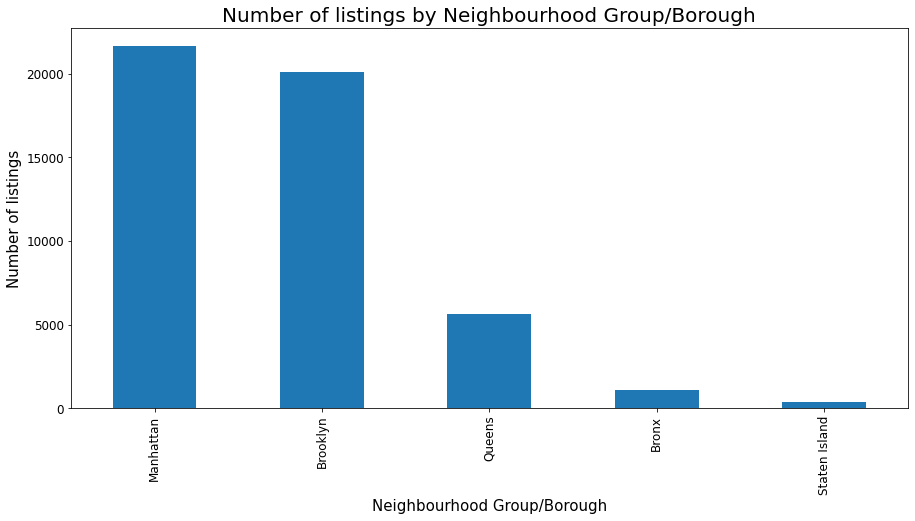

In [ ]:
# Now check the number of properties listed in each borough/neighbourhood_group
property_by_group = airbnb_df['neighbourhood_group'].value_counts()

# plot the BAr graph for visualising the data
property_by_group_plot = property_by_group.plot.bar(figsize = (15,7), fontsize = 12)
property_by_group_plot.set_title('Number of listings by Neighbourhood Group/Borough',fontsize = 20)
property_by_group_plot.set_xlabel('Neighbourhood Group/Borough',fontsize = 15)
property_by_group_plot.set_ylabel('Number of listings',fontsize = 15)


Most of the properties are listed in Manhattan and Brooklyn. Though, Queens also have a significant number of listings however Bronx and Sataten Island have very low numbers.

neighbourhood_group
Bronx             82.686047
Staten Island     91.458213
Queens            95.370536
Brooklyn         114.022713
Manhattan        161.479483
Name: price, dtype: float64


Text(0, 0.5, 'Average price')

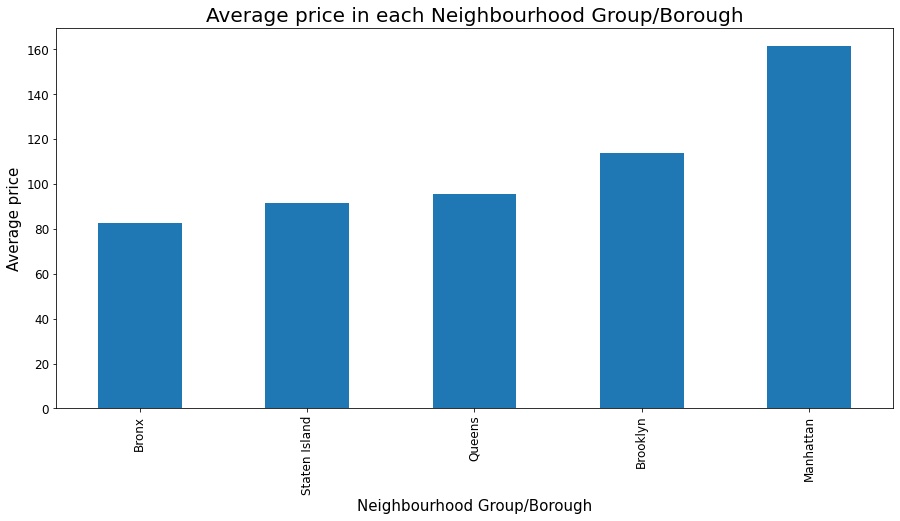

In [ ]:
# Check the average prices in all the neighbourhood groups/boroughs
borough_avg_price = airbnb_df.groupby('neighbourhood_group')['price'].mean().sort_values()

# make a bar graph to compare the average price
borough_avg_price_plot = borough_avg_price.plot.bar(figsize = (15,7), fontsize = 12)
borough_avg_price_plot.set_title('Average price in each Neighbourhood Group/Borough',fontsize = 20)
borough_avg_price_plot.set_xlabel('Neighbourhood Group/Borough',fontsize = 15)
borough_avg_price_plot.set_ylabel('Average price',fontsize = 15)




As it well known Manhattan is the most expensive borough to live in the New York City. Whereas, Bronx and Staten Island are cheapes ones. As they are cheapest, they may be the preferencial choice for customers. We will again cross check this statement during further analysis.

In [ ]:
# Earlier we checked average price, now check the general price range in each borough

price_range = airbnb_df.groupby('neighbourhood_group')['price'].describe()
price_range

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1032.0,82.686047,61.563073,10.0,46.00,65.0,99.0,500.0
Brooklyn,18095.0,114.022713,76.134550,10.0,60.00,90.0,149.0,520.0
Manhattan,17498.0,161.479483,96.145347,10.0,90.00,140.0,200.0,524.0
Queens,5152.0,95.370536,65.349832,10.0,54.75,75.0,115.0,509.0
Staten Island,347.0,91.458213,63.256569,13.0,50.00,75.0,109.0,450.0


In [ ]:
# # Check the average prices in all the neighbourhood groups/boroughs

# Brooklyn = airbnb_df.loc[airbnb_df['neighbourhood_group']=='Brooklyn']
# Brooklyn_price = Brooklyn[['price']]

# Manhattan = airbnb_df.loc[airbnb_df['neighbourhood_group']=='Manhattan']
# Manhattan_price = Manhattan[['price']]

# Queens = airbnb_df.loc[airbnb_df['neighbourhood_group']=='Queens']
# Queens_price = Queens[['price']]

# Staten_Island = airbnb_df.loc[airbnb_df['neighbourhood_group']=='Staten Island']
# Staten_Island_price = Staten_Island[['price']]

# Bronx = airbnb_df.loc[airbnb_df['neighbourhood_group']=='Bronx']
# Bronx_price = Bronx[['price']].value_counts()

# # price_in_each_borough = np.hstack((Brooklyn_price,Manhattan_price,Queens_price,Staten_Island_price,Bronx_price))

# # make the plot


# # property_by_group
# # price_in_each_borough

In [ ]:
# now check for average pricing the each boroughs



In [ ]:
# types of property available
airbnb_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# For
len(airbnb_df.host_id.unique())


37457

number of Host IDs are 37457, that indicated more than one properties are registered with same Host ID.

In [ ]:
airbnb_df.host_id.value_counts().head(20)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
26377263      43
2119276       39
19303369      37
119669058     34
25237492      34
Name: host_id, dtype: int64

Thats amazing to see that some hosts have registered 100+ properties.And the HIghest number of properties registered is 324. Let's plot a bar graph to visualise the distribution.

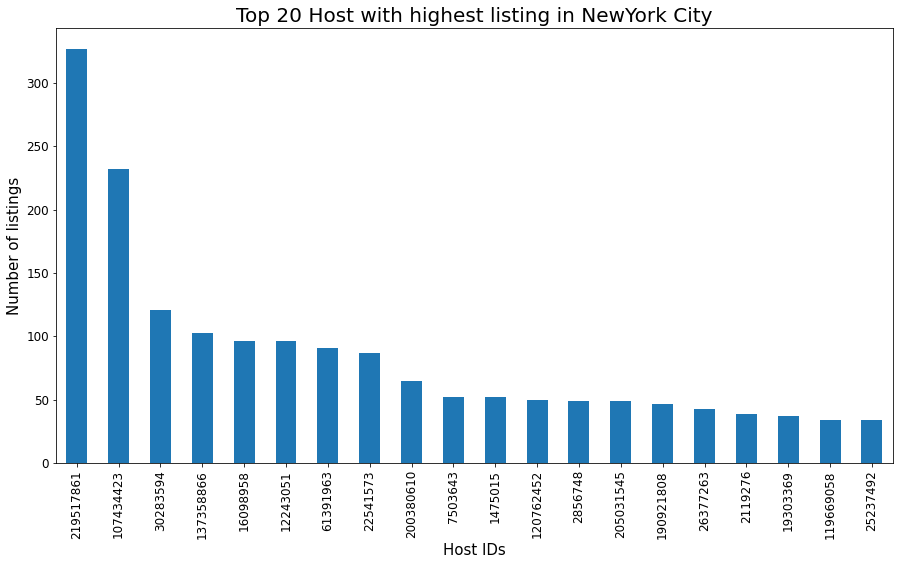

In [ ]:
host_IDs_count = airbnb_df.host_id.value_counts().head(20)

# make the plot
host_IDs_count_plot = host_IDs_count.plot.bar(figsize = (15,8), fontsize = 12)
host_IDs_count_plot.set_title('Top 20 Host with highest listing in NewYork City',fontsize = 20)
host_IDs_count_plot.set_xlabel('Host IDs',fontsize = 15)
host_IDs_count_plot.set_ylabel('Number of listings',fontsize = 15)

host_IDs_count_plot


We see 2 host have listing more than 200. However, there is good distri